## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.607
Method:                 Least Squares   F-statistic:                              3187.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:29:40   Log-Likelihood:                         -15738.
No. Observations:               16512   AIC:                                  3.149e+04
Df Residuals:                   16504   BIC:                                  3.155e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

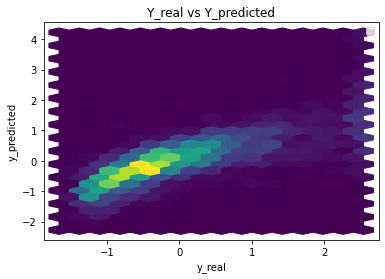

Performance Metrics
Mean Squared Error: 0.3932889053518941
Mean Absolute Error: 0.46037533455444407
Manhattan distance: 1900.42938104074
Euclidean distance: 40.292637060542624


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.39087327327408433


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9668033	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.9347739	total: 63.8ms	remaining: 31.9s
2:	learn: 0.9053783	total: 66.4ms	remaining: 22.1s
3:	learn: 0.8778637	total: 69.4ms	remaining: 17.3s
4:	learn: 0.8514724	total: 72.1ms	remaining: 14.3s
5:	learn: 0.8266088	total: 74.8ms	remaining: 12.4s
6:	learn: 0.8044903	total: 77.8ms	remaining: 11s
7:	learn: 0.7836262	total: 80.1ms	remaining: 9.93s
8:	learn: 0.7640950	total: 82.7ms	remaining: 9.11s
9:	learn: 0.7453214	total: 85.2ms	remaining: 8.44s
10:	learn: 0.7288851	total: 87.9ms	remaining: 7.9s
11:	learn: 0.7135420	total: 90.3ms	remaining: 7.44s
12:	learn: 0.6997774	total: 92.6ms	remaining: 7.03s
13:	learn: 0.6851147	total: 95.3ms	remaining: 6.71s
14:	learn: 0.6730567	total: 98.5ms	remaining: 6.46s
15:	learn: 0.6613000	total: 101ms	remaining: 6.2s
16:	learn: 0.6515296	total: 103ms	remaining: 5.98s
17:	learn: 0.6419435	total: 106ms	remaining: 5.78s
18:	learn: 0.6329713	total: 109ms	remaining: 5.6s
1

26:	learn: 0.5758573	total: 128ms	remaining: 4.63s
27:	learn: 0.5708188	total: 131ms	remaining: 4.55s
28:	learn: 0.5650043	total: 133ms	remaining: 4.46s
29:	learn: 0.5608476	total: 136ms	remaining: 4.39s
30:	learn: 0.5576949	total: 138ms	remaining: 4.32s
31:	learn: 0.5543243	total: 141ms	remaining: 4.25s
32:	learn: 0.5505760	total: 143ms	remaining: 4.2s
33:	learn: 0.5477236	total: 145ms	remaining: 4.13s
34:	learn: 0.5425740	total: 148ms	remaining: 4.08s
35:	learn: 0.5393743	total: 150ms	remaining: 4.02s
36:	learn: 0.5340760	total: 153ms	remaining: 3.97s
37:	learn: 0.5312347	total: 155ms	remaining: 3.93s
38:	learn: 0.5270089	total: 158ms	remaining: 3.88s
39:	learn: 0.5238402	total: 160ms	remaining: 3.84s
40:	learn: 0.5217838	total: 163ms	remaining: 3.8s
41:	learn: 0.5199010	total: 165ms	remaining: 3.76s
42:	learn: 0.5169006	total: 167ms	remaining: 3.72s
43:	learn: 0.5153195	total: 170ms	remaining: 3.69s
44:	learn: 0.5139442	total: 172ms	remaining: 3.65s
45:	learn: 0.5105865	total: 175ms

53:	learn: 0.4926671	total: 196ms	remaining: 3.43s
54:	learn: 0.4903848	total: 198ms	remaining: 3.41s
55:	learn: 0.4886865	total: 201ms	remaining: 3.38s
56:	learn: 0.4874889	total: 203ms	remaining: 3.36s
57:	learn: 0.4862358	total: 206ms	remaining: 3.34s
58:	learn: 0.4851405	total: 208ms	remaining: 3.32s
59:	learn: 0.4839855	total: 211ms	remaining: 3.3s
60:	learn: 0.4816150	total: 213ms	remaining: 3.27s
61:	learn: 0.4806088	total: 216ms	remaining: 3.26s
62:	learn: 0.4797280	total: 218ms	remaining: 3.24s
63:	learn: 0.4784970	total: 221ms	remaining: 3.23s
64:	learn: 0.4771583	total: 223ms	remaining: 3.21s
65:	learn: 0.4764687	total: 225ms	remaining: 3.19s
66:	learn: 0.4754307	total: 228ms	remaining: 3.17s
67:	learn: 0.4732557	total: 230ms	remaining: 3.16s
68:	learn: 0.4722264	total: 233ms	remaining: 3.14s
69:	learn: 0.4711175	total: 235ms	remaining: 3.12s
70:	learn: 0.4705472	total: 238ms	remaining: 3.11s
71:	learn: 0.4695268	total: 240ms	remaining: 3.1s
72:	learn: 0.4689120	total: 243ms

106:	learn: 0.4457870	total: 326ms	remaining: 2.72s
107:	learn: 0.4450133	total: 329ms	remaining: 2.71s
108:	learn: 0.4443539	total: 331ms	remaining: 2.71s
109:	learn: 0.4438224	total: 334ms	remaining: 2.7s
110:	learn: 0.4432560	total: 336ms	remaining: 2.69s
111:	learn: 0.4428879	total: 338ms	remaining: 2.68s
112:	learn: 0.4426025	total: 341ms	remaining: 2.67s
113:	learn: 0.4422208	total: 343ms	remaining: 2.67s
114:	learn: 0.4417984	total: 346ms	remaining: 2.66s
115:	learn: 0.4414825	total: 348ms	remaining: 2.65s
116:	learn: 0.4412334	total: 351ms	remaining: 2.65s
117:	learn: 0.4403521	total: 353ms	remaining: 2.64s
118:	learn: 0.4399516	total: 356ms	remaining: 2.63s
119:	learn: 0.4393812	total: 358ms	remaining: 2.63s
120:	learn: 0.4388067	total: 361ms	remaining: 2.62s
121:	learn: 0.4385305	total: 364ms	remaining: 2.62s
122:	learn: 0.4379916	total: 366ms	remaining: 2.61s
123:	learn: 0.4371498	total: 368ms	remaining: 2.6s
124:	learn: 0.4366584	total: 371ms	remaining: 2.59s
125:	learn: 0.

132:	learn: 0.4325191	total: 391ms	remaining: 2.55s
133:	learn: 0.4316010	total: 393ms	remaining: 2.54s
134:	learn: 0.4312649	total: 396ms	remaining: 2.54s
135:	learn: 0.4305483	total: 398ms	remaining: 2.53s
136:	learn: 0.4303325	total: 401ms	remaining: 2.52s
137:	learn: 0.4299610	total: 403ms	remaining: 2.52s
138:	learn: 0.4296000	total: 405ms	remaining: 2.51s
139:	learn: 0.4290627	total: 408ms	remaining: 2.5s
140:	learn: 0.4285605	total: 410ms	remaining: 2.5s
141:	learn: 0.4282667	total: 413ms	remaining: 2.5s
142:	learn: 0.4277508	total: 415ms	remaining: 2.49s
143:	learn: 0.4274711	total: 418ms	remaining: 2.48s
144:	learn: 0.4271126	total: 421ms	remaining: 2.48s
145:	learn: 0.4268478	total: 423ms	remaining: 2.47s
146:	learn: 0.4264627	total: 425ms	remaining: 2.47s
147:	learn: 0.4256781	total: 428ms	remaining: 2.46s
148:	learn: 0.4252251	total: 430ms	remaining: 2.46s
149:	learn: 0.4247770	total: 433ms	remaining: 2.45s
150:	learn: 0.4244025	total: 436ms	remaining: 2.45s
151:	learn: 0.4

185:	learn: 0.4095481	total: 521ms	remaining: 2.28s
186:	learn: 0.4092734	total: 523ms	remaining: 2.27s
187:	learn: 0.4089203	total: 526ms	remaining: 2.27s
188:	learn: 0.4084679	total: 528ms	remaining: 2.27s
189:	learn: 0.4080199	total: 531ms	remaining: 2.26s
190:	learn: 0.4077147	total: 534ms	remaining: 2.26s
191:	learn: 0.4074591	total: 536ms	remaining: 2.26s
192:	learn: 0.4069541	total: 539ms	remaining: 2.25s
193:	learn: 0.4065143	total: 541ms	remaining: 2.25s
194:	learn: 0.4062339	total: 544ms	remaining: 2.25s
195:	learn: 0.4059154	total: 546ms	remaining: 2.24s
196:	learn: 0.4055471	total: 549ms	remaining: 2.24s
197:	learn: 0.4052427	total: 552ms	remaining: 2.23s
198:	learn: 0.4049176	total: 554ms	remaining: 2.23s
199:	learn: 0.4046385	total: 557ms	remaining: 2.23s
200:	learn: 0.4043018	total: 559ms	remaining: 2.22s
201:	learn: 0.4040214	total: 562ms	remaining: 2.22s
202:	learn: 0.4036841	total: 565ms	remaining: 2.22s
203:	learn: 0.4032669	total: 567ms	remaining: 2.21s
204:	learn: 

211:	learn: 0.4007115	total: 586ms	remaining: 2.18s
212:	learn: 0.4001058	total: 589ms	remaining: 2.18s
213:	learn: 0.3998784	total: 591ms	remaining: 2.17s
214:	learn: 0.3996620	total: 594ms	remaining: 2.17s
215:	learn: 0.3990025	total: 596ms	remaining: 2.16s
216:	learn: 0.3986666	total: 599ms	remaining: 2.16s
217:	learn: 0.3984311	total: 601ms	remaining: 2.15s
218:	learn: 0.3981465	total: 603ms	remaining: 2.15s
219:	learn: 0.3977382	total: 605ms	remaining: 2.15s
220:	learn: 0.3974413	total: 607ms	remaining: 2.14s
221:	learn: 0.3971088	total: 610ms	remaining: 2.14s
222:	learn: 0.3968168	total: 612ms	remaining: 2.13s
223:	learn: 0.3964714	total: 614ms	remaining: 2.13s
224:	learn: 0.3961018	total: 617ms	remaining: 2.12s
225:	learn: 0.3957257	total: 619ms	remaining: 2.12s
226:	learn: 0.3954488	total: 622ms	remaining: 2.12s
227:	learn: 0.3952114	total: 624ms	remaining: 2.11s
228:	learn: 0.3948965	total: 626ms	remaining: 2.11s
229:	learn: 0.3946328	total: 629ms	remaining: 2.1s
230:	learn: 0

265:	learn: 0.3853696	total: 716ms	remaining: 1.98s
266:	learn: 0.3852213	total: 719ms	remaining: 1.97s
267:	learn: 0.3850366	total: 721ms	remaining: 1.97s
268:	learn: 0.3848642	total: 724ms	remaining: 1.97s
269:	learn: 0.3844746	total: 726ms	remaining: 1.96s
270:	learn: 0.3842929	total: 729ms	remaining: 1.96s
271:	learn: 0.3840925	total: 731ms	remaining: 1.96s
272:	learn: 0.3837756	total: 733ms	remaining: 1.95s
273:	learn: 0.3835140	total: 736ms	remaining: 1.95s
274:	learn: 0.3833247	total: 738ms	remaining: 1.95s
275:	learn: 0.3831512	total: 741ms	remaining: 1.94s
276:	learn: 0.3829783	total: 743ms	remaining: 1.94s
277:	learn: 0.3827672	total: 745ms	remaining: 1.94s
278:	learn: 0.3825179	total: 748ms	remaining: 1.93s
279:	learn: 0.3823220	total: 750ms	remaining: 1.93s
280:	learn: 0.3821620	total: 753ms	remaining: 1.93s
281:	learn: 0.3820126	total: 755ms	remaining: 1.92s
282:	learn: 0.3818080	total: 758ms	remaining: 1.92s
283:	learn: 0.3816398	total: 760ms	remaining: 1.92s
284:	learn: 

293:	learn: 0.3793150	total: 783ms	remaining: 1.88s
294:	learn: 0.3790693	total: 786ms	remaining: 1.88s
295:	learn: 0.3787900	total: 789ms	remaining: 1.88s
296:	learn: 0.3784824	total: 791ms	remaining: 1.87s
297:	learn: 0.3782257	total: 793ms	remaining: 1.87s
298:	learn: 0.3780253	total: 796ms	remaining: 1.86s
299:	learn: 0.3777792	total: 798ms	remaining: 1.86s
300:	learn: 0.3775927	total: 801ms	remaining: 1.86s
301:	learn: 0.3774362	total: 803ms	remaining: 1.85s
302:	learn: 0.3772394	total: 805ms	remaining: 1.85s
303:	learn: 0.3770804	total: 808ms	remaining: 1.85s
304:	learn: 0.3766695	total: 810ms	remaining: 1.85s
305:	learn: 0.3765038	total: 813ms	remaining: 1.84s
306:	learn: 0.3762892	total: 815ms	remaining: 1.84s
307:	learn: 0.3760666	total: 818ms	remaining: 1.84s
308:	learn: 0.3759008	total: 820ms	remaining: 1.83s
309:	learn: 0.3757587	total: 823ms	remaining: 1.83s
310:	learn: 0.3755880	total: 825ms	remaining: 1.83s
311:	learn: 0.3754857	total: 828ms	remaining: 1.82s
312:	learn: 

347:	learn: 0.3681969	total: 914ms	remaining: 1.71s
348:	learn: 0.3679583	total: 916ms	remaining: 1.71s
349:	learn: 0.3677261	total: 919ms	remaining: 1.71s
350:	learn: 0.3675319	total: 922ms	remaining: 1.7s
351:	learn: 0.3673209	total: 924ms	remaining: 1.7s
352:	learn: 0.3671492	total: 927ms	remaining: 1.7s
353:	learn: 0.3670116	total: 929ms	remaining: 1.7s
354:	learn: 0.3668822	total: 932ms	remaining: 1.69s
355:	learn: 0.3667916	total: 934ms	remaining: 1.69s
356:	learn: 0.3666520	total: 936ms	remaining: 1.69s
357:	learn: 0.3663755	total: 939ms	remaining: 1.68s
358:	learn: 0.3662133	total: 941ms	remaining: 1.68s
359:	learn: 0.3659892	total: 943ms	remaining: 1.68s
360:	learn: 0.3657304	total: 946ms	remaining: 1.67s
361:	learn: 0.3656288	total: 948ms	remaining: 1.67s
362:	learn: 0.3653991	total: 951ms	remaining: 1.67s
363:	learn: 0.3650588	total: 953ms	remaining: 1.67s
364:	learn: 0.3649326	total: 956ms	remaining: 1.66s
365:	learn: 0.3646910	total: 958ms	remaining: 1.66s
366:	learn: 0.36

374:	learn: 0.3630354	total: 979ms	remaining: 1.63s
375:	learn: 0.3627834	total: 982ms	remaining: 1.63s
376:	learn: 0.3626004	total: 984ms	remaining: 1.63s
377:	learn: 0.3624598	total: 987ms	remaining: 1.62s
378:	learn: 0.3622746	total: 990ms	remaining: 1.62s
379:	learn: 0.3621283	total: 992ms	remaining: 1.62s
380:	learn: 0.3619758	total: 994ms	remaining: 1.61s
381:	learn: 0.3618361	total: 997ms	remaining: 1.61s
382:	learn: 0.3617007	total: 999ms	remaining: 1.61s
383:	learn: 0.3614979	total: 1s	remaining: 1.61s
384:	learn: 0.3612662	total: 1s	remaining: 1.6s
385:	learn: 0.3610600	total: 1.01s	remaining: 1.6s
386:	learn: 0.3608026	total: 1.01s	remaining: 1.6s
387:	learn: 0.3606375	total: 1.01s	remaining: 1.59s
388:	learn: 0.3604813	total: 1.01s	remaining: 1.59s
389:	learn: 0.3603142	total: 1.02s	remaining: 1.59s
390:	learn: 0.3601379	total: 1.02s	remaining: 1.59s
391:	learn: 0.3600110	total: 1.02s	remaining: 1.58s
392:	learn: 0.3598460	total: 1.02s	remaining: 1.58s
393:	learn: 0.3597304

427:	learn: 0.3544503	total: 1.11s	remaining: 1.48s
428:	learn: 0.3542792	total: 1.11s	remaining: 1.48s
429:	learn: 0.3540301	total: 1.11s	remaining: 1.48s
430:	learn: 0.3538228	total: 1.12s	remaining: 1.48s
431:	learn: 0.3536672	total: 1.12s	remaining: 1.47s
432:	learn: 0.3534466	total: 1.12s	remaining: 1.47s
433:	learn: 0.3533264	total: 1.12s	remaining: 1.47s
434:	learn: 0.3531444	total: 1.13s	remaining: 1.46s
435:	learn: 0.3529522	total: 1.13s	remaining: 1.46s
436:	learn: 0.3528184	total: 1.13s	remaining: 1.46s
437:	learn: 0.3526637	total: 1.13s	remaining: 1.46s
438:	learn: 0.3525288	total: 1.14s	remaining: 1.45s
439:	learn: 0.3524050	total: 1.14s	remaining: 1.45s
440:	learn: 0.3522869	total: 1.14s	remaining: 1.45s
441:	learn: 0.3520853	total: 1.14s	remaining: 1.44s
442:	learn: 0.3519385	total: 1.15s	remaining: 1.44s
443:	learn: 0.3518220	total: 1.15s	remaining: 1.44s
444:	learn: 0.3516531	total: 1.15s	remaining: 1.44s
445:	learn: 0.3515408	total: 1.15s	remaining: 1.43s
446:	learn: 

454:	learn: 0.3504787	total: 1.17s	remaining: 1.41s
455:	learn: 0.3503557	total: 1.18s	remaining: 1.4s
456:	learn: 0.3501922	total: 1.18s	remaining: 1.4s
457:	learn: 0.3499733	total: 1.18s	remaining: 1.4s
458:	learn: 0.3497876	total: 1.18s	remaining: 1.4s
459:	learn: 0.3496589	total: 1.19s	remaining: 1.39s
460:	learn: 0.3495176	total: 1.19s	remaining: 1.39s
461:	learn: 0.3493603	total: 1.19s	remaining: 1.39s
462:	learn: 0.3492928	total: 1.19s	remaining: 1.39s
463:	learn: 0.3492008	total: 1.2s	remaining: 1.38s
464:	learn: 0.3490924	total: 1.2s	remaining: 1.38s
465:	learn: 0.3489265	total: 1.2s	remaining: 1.38s
466:	learn: 0.3488144	total: 1.2s	remaining: 1.37s
467:	learn: 0.3486304	total: 1.21s	remaining: 1.37s
468:	learn: 0.3485596	total: 1.21s	remaining: 1.37s
469:	learn: 0.3484712	total: 1.21s	remaining: 1.37s
470:	learn: 0.3483362	total: 1.21s	remaining: 1.36s
471:	learn: 0.3482316	total: 1.22s	remaining: 1.36s
472:	learn: 0.3481224	total: 1.22s	remaining: 1.36s
473:	learn: 0.348031

507:	learn: 0.3436059	total: 1.31s	remaining: 1.26s
508:	learn: 0.3435086	total: 1.31s	remaining: 1.26s
509:	learn: 0.3434635	total: 1.31s	remaining: 1.26s
510:	learn: 0.3433324	total: 1.31s	remaining: 1.26s
511:	learn: 0.3432030	total: 1.32s	remaining: 1.25s
512:	learn: 0.3430075	total: 1.32s	remaining: 1.25s
513:	learn: 0.3429401	total: 1.32s	remaining: 1.25s
514:	learn: 0.3428306	total: 1.32s	remaining: 1.25s
515:	learn: 0.3426911	total: 1.33s	remaining: 1.25s
516:	learn: 0.3424198	total: 1.33s	remaining: 1.24s
517:	learn: 0.3423253	total: 1.33s	remaining: 1.24s
518:	learn: 0.3422217	total: 1.33s	remaining: 1.24s
519:	learn: 0.3421138	total: 1.34s	remaining: 1.24s
520:	learn: 0.3419186	total: 1.34s	remaining: 1.23s
521:	learn: 0.3416772	total: 1.34s	remaining: 1.23s
522:	learn: 0.3415650	total: 1.35s	remaining: 1.23s
523:	learn: 0.3414336	total: 1.35s	remaining: 1.23s
524:	learn: 0.3412236	total: 1.35s	remaining: 1.23s
525:	learn: 0.3411034	total: 1.36s	remaining: 1.22s
526:	learn: 

531:	learn: 0.3403185	total: 1.37s	remaining: 1.21s
532:	learn: 0.3402076	total: 1.37s	remaining: 1.2s
533:	learn: 0.3400256	total: 1.38s	remaining: 1.2s
534:	learn: 0.3399504	total: 1.38s	remaining: 1.2s
535:	learn: 0.3397666	total: 1.38s	remaining: 1.2s
536:	learn: 0.3396166	total: 1.38s	remaining: 1.19s
537:	learn: 0.3395062	total: 1.39s	remaining: 1.19s
538:	learn: 0.3393291	total: 1.39s	remaining: 1.19s
539:	learn: 0.3392283	total: 1.39s	remaining: 1.18s
540:	learn: 0.3391445	total: 1.39s	remaining: 1.18s
541:	learn: 0.3390706	total: 1.4s	remaining: 1.18s
542:	learn: 0.3389283	total: 1.4s	remaining: 1.18s
543:	learn: 0.3388199	total: 1.4s	remaining: 1.17s
544:	learn: 0.3387681	total: 1.4s	remaining: 1.17s
545:	learn: 0.3386115	total: 1.4s	remaining: 1.17s
546:	learn: 0.3384788	total: 1.41s	remaining: 1.17s
547:	learn: 0.3384163	total: 1.41s	remaining: 1.16s
548:	learn: 0.3382685	total: 1.41s	remaining: 1.16s
549:	learn: 0.3381852	total: 1.41s	remaining: 1.16s
550:	learn: 0.3380286

585:	learn: 0.3340419	total: 1.5s	remaining: 1.06s
586:	learn: 0.3339597	total: 1.5s	remaining: 1.06s
587:	learn: 0.3338795	total: 1.51s	remaining: 1.06s
588:	learn: 0.3338367	total: 1.51s	remaining: 1.05s
589:	learn: 0.3337042	total: 1.51s	remaining: 1.05s
590:	learn: 0.3336123	total: 1.51s	remaining: 1.05s
591:	learn: 0.3335336	total: 1.52s	remaining: 1.04s
592:	learn: 0.3334398	total: 1.52s	remaining: 1.04s
593:	learn: 0.3333312	total: 1.52s	remaining: 1.04s
594:	learn: 0.3331328	total: 1.52s	remaining: 1.04s
595:	learn: 0.3329893	total: 1.53s	remaining: 1.03s
596:	learn: 0.3328720	total: 1.53s	remaining: 1.03s
597:	learn: 0.3327519	total: 1.53s	remaining: 1.03s
598:	learn: 0.3327193	total: 1.53s	remaining: 1.03s
599:	learn: 0.3326270	total: 1.54s	remaining: 1.02s
600:	learn: 0.3325515	total: 1.54s	remaining: 1.02s
601:	learn: 0.3324696	total: 1.54s	remaining: 1.02s
602:	learn: 0.3323354	total: 1.54s	remaining: 1.02s
603:	learn: 0.3322141	total: 1.55s	remaining: 1.01s
604:	learn: 0.

611:	learn: 0.3313939	total: 1.57s	remaining: 994ms
612:	learn: 0.3313085	total: 1.57s	remaining: 991ms
613:	learn: 0.3312109	total: 1.57s	remaining: 989ms
614:	learn: 0.3311229	total: 1.57s	remaining: 986ms
615:	learn: 0.3310106	total: 1.58s	remaining: 983ms
616:	learn: 0.3309244	total: 1.58s	remaining: 981ms
617:	learn: 0.3307464	total: 1.58s	remaining: 978ms
618:	learn: 0.3306792	total: 1.58s	remaining: 976ms
619:	learn: 0.3305884	total: 1.59s	remaining: 973ms
620:	learn: 0.3305040	total: 1.59s	remaining: 970ms
621:	learn: 0.3304109	total: 1.59s	remaining: 968ms
622:	learn: 0.3303326	total: 1.59s	remaining: 965ms
623:	learn: 0.3301841	total: 1.6s	remaining: 963ms
624:	learn: 0.3300572	total: 1.6s	remaining: 960ms
625:	learn: 0.3299725	total: 1.6s	remaining: 958ms
626:	learn: 0.3298895	total: 1.6s	remaining: 955ms
627:	learn: 0.3297765	total: 1.61s	remaining: 952ms
628:	learn: 0.3296900	total: 1.61s	remaining: 950ms
629:	learn: 0.3295419	total: 1.61s	remaining: 947ms
630:	learn: 0.32

665:	learn: 0.3257331	total: 1.7s	remaining: 852ms
666:	learn: 0.3256200	total: 1.7s	remaining: 849ms
667:	learn: 0.3254879	total: 1.7s	remaining: 847ms
668:	learn: 0.3254338	total: 1.71s	remaining: 844ms
669:	learn: 0.3252901	total: 1.71s	remaining: 841ms
670:	learn: 0.3251657	total: 1.71s	remaining: 839ms
671:	learn: 0.3250614	total: 1.71s	remaining: 836ms
672:	learn: 0.3248827	total: 1.72s	remaining: 833ms
673:	learn: 0.3247774	total: 1.72s	remaining: 831ms
674:	learn: 0.3246479	total: 1.72s	remaining: 828ms
675:	learn: 0.3245036	total: 1.72s	remaining: 825ms
676:	learn: 0.3244116	total: 1.72s	remaining: 823ms
677:	learn: 0.3242886	total: 1.73s	remaining: 820ms
678:	learn: 0.3241803	total: 1.73s	remaining: 818ms
679:	learn: 0.3240333	total: 1.73s	remaining: 815ms
680:	learn: 0.3239263	total: 1.73s	remaining: 812ms
681:	learn: 0.3238080	total: 1.74s	remaining: 810ms
682:	learn: 0.3236986	total: 1.74s	remaining: 807ms
683:	learn: 0.3235397	total: 1.74s	remaining: 804ms
684:	learn: 0.3

692:	learn: 0.3226935	total: 1.76s	remaining: 781ms
693:	learn: 0.3225684	total: 1.76s	remaining: 779ms
694:	learn: 0.3224723	total: 1.77s	remaining: 776ms
695:	learn: 0.3223783	total: 1.77s	remaining: 773ms
696:	learn: 0.3222913	total: 1.77s	remaining: 771ms
697:	learn: 0.3221771	total: 1.77s	remaining: 768ms
698:	learn: 0.3220440	total: 1.78s	remaining: 766ms
699:	learn: 0.3220151	total: 1.78s	remaining: 763ms
700:	learn: 0.3219010	total: 1.78s	remaining: 760ms
701:	learn: 0.3218358	total: 1.78s	remaining: 758ms
702:	learn: 0.3217311	total: 1.79s	remaining: 755ms
703:	learn: 0.3216143	total: 1.79s	remaining: 753ms
704:	learn: 0.3215287	total: 1.79s	remaining: 750ms
705:	learn: 0.3213300	total: 1.79s	remaining: 748ms
706:	learn: 0.3212488	total: 1.8s	remaining: 745ms
707:	learn: 0.3211924	total: 1.8s	remaining: 742ms
708:	learn: 0.3211296	total: 1.8s	remaining: 740ms
709:	learn: 0.3209892	total: 1.8s	remaining: 737ms
710:	learn: 0.3208526	total: 1.81s	remaining: 734ms
711:	learn: 0.32

746:	learn: 0.3174742	total: 1.89s	remaining: 641ms
747:	learn: 0.3173987	total: 1.9s	remaining: 639ms
748:	learn: 0.3173409	total: 1.9s	remaining: 636ms
749:	learn: 0.3171943	total: 1.9s	remaining: 634ms
750:	learn: 0.3170919	total: 1.9s	remaining: 631ms
751:	learn: 0.3170416	total: 1.91s	remaining: 628ms
752:	learn: 0.3169617	total: 1.91s	remaining: 626ms
753:	learn: 0.3168656	total: 1.91s	remaining: 623ms
754:	learn: 0.3167734	total: 1.91s	remaining: 621ms
755:	learn: 0.3166825	total: 1.91s	remaining: 618ms
756:	learn: 0.3165663	total: 1.92s	remaining: 615ms
757:	learn: 0.3164823	total: 1.92s	remaining: 613ms
758:	learn: 0.3164051	total: 1.92s	remaining: 610ms
759:	learn: 0.3163166	total: 1.93s	remaining: 608ms
760:	learn: 0.3162230	total: 1.93s	remaining: 605ms
761:	learn: 0.3160956	total: 1.93s	remaining: 603ms
762:	learn: 0.3159923	total: 1.93s	remaining: 600ms
763:	learn: 0.3158753	total: 1.93s	remaining: 598ms
764:	learn: 0.3157867	total: 1.94s	remaining: 595ms
765:	learn: 0.31

773:	learn: 0.3149394	total: 1.96s	remaining: 572ms
774:	learn: 0.3148707	total: 1.96s	remaining: 570ms
775:	learn: 0.3147676	total: 1.96s	remaining: 567ms
776:	learn: 0.3146990	total: 1.97s	remaining: 565ms
777:	learn: 0.3146095	total: 1.97s	remaining: 562ms
778:	learn: 0.3145237	total: 1.97s	remaining: 559ms
779:	learn: 0.3144437	total: 1.97s	remaining: 557ms
780:	learn: 0.3143614	total: 1.98s	remaining: 554ms
781:	learn: 0.3142523	total: 1.98s	remaining: 552ms
782:	learn: 0.3141489	total: 1.98s	remaining: 549ms
783:	learn: 0.3141277	total: 1.98s	remaining: 547ms
784:	learn: 0.3140628	total: 1.99s	remaining: 544ms
785:	learn: 0.3139439	total: 1.99s	remaining: 541ms
786:	learn: 0.3138009	total: 1.99s	remaining: 539ms
787:	learn: 0.3137537	total: 1.99s	remaining: 536ms
788:	learn: 0.3136441	total: 2s	remaining: 534ms
789:	learn: 0.3135694	total: 2s	remaining: 531ms
790:	learn: 0.3135020	total: 2s	remaining: 529ms
791:	learn: 0.3134070	total: 2s	remaining: 526ms
792:	learn: 0.3133267	to

826:	learn: 0.3102840	total: 2.09s	remaining: 437ms
827:	learn: 0.3102197	total: 2.09s	remaining: 434ms
828:	learn: 0.3101636	total: 2.09s	remaining: 432ms
829:	learn: 0.3099928	total: 2.1s	remaining: 429ms
830:	learn: 0.3099236	total: 2.1s	remaining: 427ms
831:	learn: 0.3098236	total: 2.1s	remaining: 424ms
832:	learn: 0.3097561	total: 2.1s	remaining: 422ms
833:	learn: 0.3096926	total: 2.11s	remaining: 419ms
834:	learn: 0.3096206	total: 2.11s	remaining: 417ms
835:	learn: 0.3095308	total: 2.11s	remaining: 414ms
836:	learn: 0.3094397	total: 2.11s	remaining: 411ms
837:	learn: 0.3093393	total: 2.12s	remaining: 409ms
838:	learn: 0.3092884	total: 2.12s	remaining: 406ms
839:	learn: 0.3092401	total: 2.12s	remaining: 404ms
840:	learn: 0.3091627	total: 2.12s	remaining: 401ms
841:	learn: 0.3090950	total: 2.13s	remaining: 399ms
842:	learn: 0.3090291	total: 2.13s	remaining: 396ms
843:	learn: 0.3089438	total: 2.13s	remaining: 394ms
844:	learn: 0.3088505	total: 2.13s	remaining: 391ms
845:	learn: 0.30

854:	learn: 0.3079551	total: 2.16s	remaining: 366ms
855:	learn: 0.3078823	total: 2.16s	remaining: 363ms
856:	learn: 0.3078004	total: 2.16s	remaining: 361ms
857:	learn: 0.3077378	total: 2.16s	remaining: 358ms
858:	learn: 0.3076392	total: 2.17s	remaining: 356ms
859:	learn: 0.3075335	total: 2.17s	remaining: 353ms
860:	learn: 0.3074662	total: 2.17s	remaining: 351ms
861:	learn: 0.3073952	total: 2.17s	remaining: 348ms
862:	learn: 0.3073488	total: 2.18s	remaining: 346ms
863:	learn: 0.3072478	total: 2.18s	remaining: 343ms
864:	learn: 0.3071847	total: 2.18s	remaining: 341ms
865:	learn: 0.3071130	total: 2.18s	remaining: 338ms
866:	learn: 0.3070244	total: 2.19s	remaining: 336ms
867:	learn: 0.3069399	total: 2.19s	remaining: 333ms
868:	learn: 0.3068408	total: 2.19s	remaining: 331ms
869:	learn: 0.3067736	total: 2.19s	remaining: 328ms
870:	learn: 0.3066723	total: 2.2s	remaining: 325ms
871:	learn: 0.3065842	total: 2.2s	remaining: 323ms
872:	learn: 0.3064974	total: 2.2s	remaining: 320ms
873:	learn: 0.3

906:	learn: 0.3036529	total: 2.29s	remaining: 234ms
907:	learn: 0.3035696	total: 2.29s	remaining: 232ms
908:	learn: 0.3035335	total: 2.29s	remaining: 229ms
909:	learn: 0.3034696	total: 2.29s	remaining: 227ms
910:	learn: 0.3033196	total: 2.29s	remaining: 224ms
911:	learn: 0.3032514	total: 2.3s	remaining: 222ms
912:	learn: 0.3031552	total: 2.3s	remaining: 219ms
913:	learn: 0.3030439	total: 2.3s	remaining: 217ms
914:	learn: 0.3030297	total: 2.31s	remaining: 214ms
915:	learn: 0.3029412	total: 2.31s	remaining: 212ms
916:	learn: 0.3028727	total: 2.31s	remaining: 209ms
917:	learn: 0.3027890	total: 2.31s	remaining: 207ms
918:	learn: 0.3026808	total: 2.31s	remaining: 204ms
919:	learn: 0.3026275	total: 2.32s	remaining: 202ms
920:	learn: 0.3025411	total: 2.32s	remaining: 199ms
921:	learn: 0.3024723	total: 2.32s	remaining: 196ms
922:	learn: 0.3023826	total: 2.32s	remaining: 194ms
923:	learn: 0.3022998	total: 2.33s	remaining: 191ms
924:	learn: 0.3022547	total: 2.33s	remaining: 189ms
925:	learn: 0.3

934:	learn: 0.3015470	total: 2.35s	remaining: 164ms
935:	learn: 0.3014606	total: 2.36s	remaining: 161ms
936:	learn: 0.3013368	total: 2.36s	remaining: 159ms
937:	learn: 0.3012640	total: 2.36s	remaining: 156ms
938:	learn: 0.3011814	total: 2.37s	remaining: 154ms
939:	learn: 0.3011070	total: 2.37s	remaining: 151ms
940:	learn: 0.3010281	total: 2.37s	remaining: 149ms
941:	learn: 0.3009614	total: 2.37s	remaining: 146ms
942:	learn: 0.3008876	total: 2.37s	remaining: 144ms
943:	learn: 0.3008106	total: 2.38s	remaining: 141ms
944:	learn: 0.3007169	total: 2.38s	remaining: 138ms
945:	learn: 0.3006704	total: 2.38s	remaining: 136ms
946:	learn: 0.3006114	total: 2.38s	remaining: 133ms
947:	learn: 0.3005554	total: 2.39s	remaining: 131ms
948:	learn: 0.3005028	total: 2.39s	remaining: 128ms
949:	learn: 0.3004130	total: 2.39s	remaining: 126ms
950:	learn: 0.3003187	total: 2.39s	remaining: 123ms
951:	learn: 0.3002690	total: 2.4s	remaining: 121ms
952:	learn: 0.3002096	total: 2.4s	remaining: 118ms
953:	learn: 0.

986:	learn: 0.2977233	total: 2.48s	remaining: 32.7ms
987:	learn: 0.2975746	total: 2.48s	remaining: 30.2ms
988:	learn: 0.2974864	total: 2.49s	remaining: 27.7ms
989:	learn: 0.2974109	total: 2.49s	remaining: 25.1ms
990:	learn: 0.2973454	total: 2.49s	remaining: 22.6ms
991:	learn: 0.2972389	total: 2.49s	remaining: 20.1ms
992:	learn: 0.2971514	total: 2.5s	remaining: 17.6ms
993:	learn: 0.2970971	total: 2.5s	remaining: 15.1ms
994:	learn: 0.2970400	total: 2.5s	remaining: 12.6ms
995:	learn: 0.2969674	total: 2.5s	remaining: 10.1ms
996:	learn: 0.2969152	total: 2.51s	remaining: 7.54ms
997:	learn: 0.2968379	total: 2.51s	remaining: 5.03ms
998:	learn: 0.2967701	total: 2.51s	remaining: 2.51ms
999:	learn: 0.2967100	total: 2.51s	remaining: 0us
Mean Squared error 0.14838724807536807


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9764672262293336
